<a href="https://colab.research.google.com/github/UdalovIA/lab-03/blob/main/Lab_03_IAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа № 3


СРАВНИТЕЛЬНЫЙ АНАЛИЗ МЕТОДОВ КЛАССИФИКАЦИИ ДАННЫХ


Описание датасетов


1. Набор данных «Iris Data Set» – «Ирисы Фишера» (см. Л.Р.№1). 


Задание на лабораторную работу


1. Провести снижение размерности методами МГК (PCA) и t-sne. Сделать предположение о разделимости выборки на классы. В отчёт включить все графики и вывод о разделимости.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import scipy
iris = load_iris()
iris_pd=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
#import pingouin as pg
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


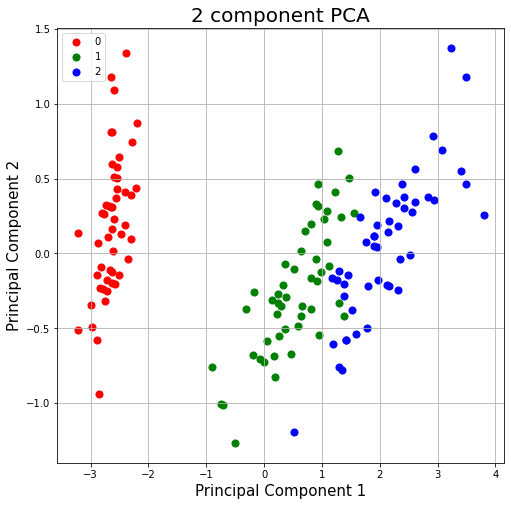

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = iris_pd.drop(columns=['target'])
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, iris_pd[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


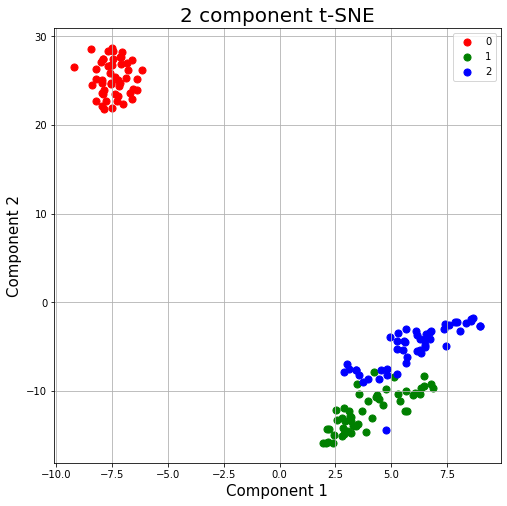

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_Components = tsne.fit_transform(data)
tsne_Df = pd.DataFrame(data = tsne_Components
             , columns = ['Component 1', 'Component 2'])
finalDf = pd.concat([tsne_Df, iris_pd[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component t-SNE', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Вывод по разделимости:
Красные хорошо отделяются от остальных
Синие и зеленые имеют пересечения, что может быть обусловлено случайностью, разделение можно провести, но с погрешностью.

2. Провести классификацию (с параметрами по умолчанию) (KNN, Logistic Regression, Random Forest, Decision Tree). Проводить обучения классификатора следует с использованием кросс-валидации. Так же требуется разделить выборку на тестовую и обучающую. Так же требуется получить данные о качестве классификации (Accuracy, Precision, Recall и F1-мера). После обучения требуется визуализировать тестовую выборку:
 1. С исходными метками
 2. С метками полученными при классификации
В отчёт включить оба графика. Сделать выводы о качестве классификации.


Разбиение выборки

In [ ]:
finalDf

,Component 1,Component 2,target
0,-7.548223,24.754969,0.0
1,-7.974909,27.091900,0.0
2,-7.464829,27.488188,0.0
3,-7.143156,27.688337,0.0
4,-7.920933,24.704277,0.0
...,...,...,...
145,5.625773,-4.477314,2.0
146,4.808921,-7.539653,2.0
147,5.522353,-5.384828,2.0
148,4.943089,-3.901082,2.0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(finalDf, test_size=0.2)

In [ ]:
from sklearn.model_selection import cross_validate

def vis_data(X,Y,X_t, Y_t, pred, pred_t, method_name):
    pred = pd.Series(pred)
    pred_t = pd.Series(pred_t)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.suptitle('Data')
    fig.set_figheight(13)
    fig.set_figwidth(13)
    
    # train original
    Df = pd.DataFrame(data = X
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y], axis = 1)
    ax1.set_xlabel('Component 1', fontsize = 15)
    ax1.set_ylabel('Component 2', fontsize = 15)
    ax1.set_title(method_name + ' train true', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax1.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax1.legend(targets)
    ax1.grid()

    # train pred

    Df = pd.DataFrame(data = X.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred
    fig = plt.figure(figsize = (8,8))
    ax2.set_xlabel('Component 1', fontsize = 15)
    ax2.set_ylabel('Component 2', fontsize = 15)
    ax2.set_title(method_name + ' train pred', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax2.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax2.legend(targets)
    ax2.grid()

    # test original

    Df = pd.DataFrame(data = X_t
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y_t], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax3.set_xlabel('Component 1', fontsize = 15)
    ax3.set_ylabel('Component 2', fontsize = 15)
    ax3.set_title(method_name + ' test true', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax3.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax3.legend(targets)
    ax3.grid()

    # test pred
    
    Df = pd.DataFrame(data = X_t.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_t
    fig = plt.figure(figsize = (8,8))
    ax4.set_xlabel('Component 1', fontsize = 15)
    ax4.set_ylabel('Component 2', fontsize = 15)
    ax4.set_title(method_name + ' test pred', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax4.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax4.legend(targets)
    ax4.grid()

def my_cross_val(X,Y, model,metrics,cv=4):
    cv_results = cross_validate(model, X, Y, cv= cv, scoring=metrics)
    model.predict
    cv_results
    return cv_results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def train_model(train,test, model,method_name, metrics = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted'] ):
    X = train.drop(columns=['target'])
    Y = train['target']
    X_t = test.drop(columns=['target'])
    Y_t = test['target']
    metrics = my_cross_val(X,Y, model, metrics)
    model.fit(X, Y)
    answers_t = model.predict(X_t)
    answers = model.predict(X)
    metrics_test = []
    metrics_test.append(accuracy_score(Y_t, answers_t))
    metrics_test.append(precision_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(recall_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(f1_score(Y_t, answers_t, average='weighted'))
    print('accuracy_score = ' + str(metrics_test[0]))
    print('precision_score = ' + str(metrics_test[1]))
    print('recall_score = ' + str(metrics_test[2]))
    print('f1_score = ' + str(metrics_test[3]))
    vis_data(X, Y, X_t,Y_t,answers,answers_t, method_name )
    return model, metrics, metrics_test

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


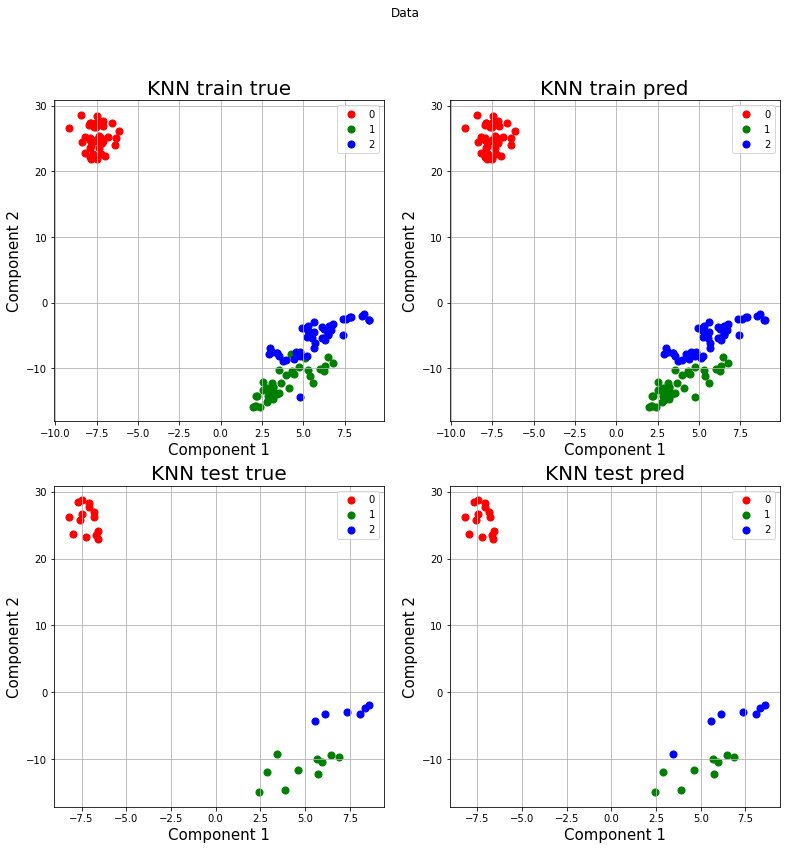

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
ans = train_model(train, test, neigh, 'KNN')

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


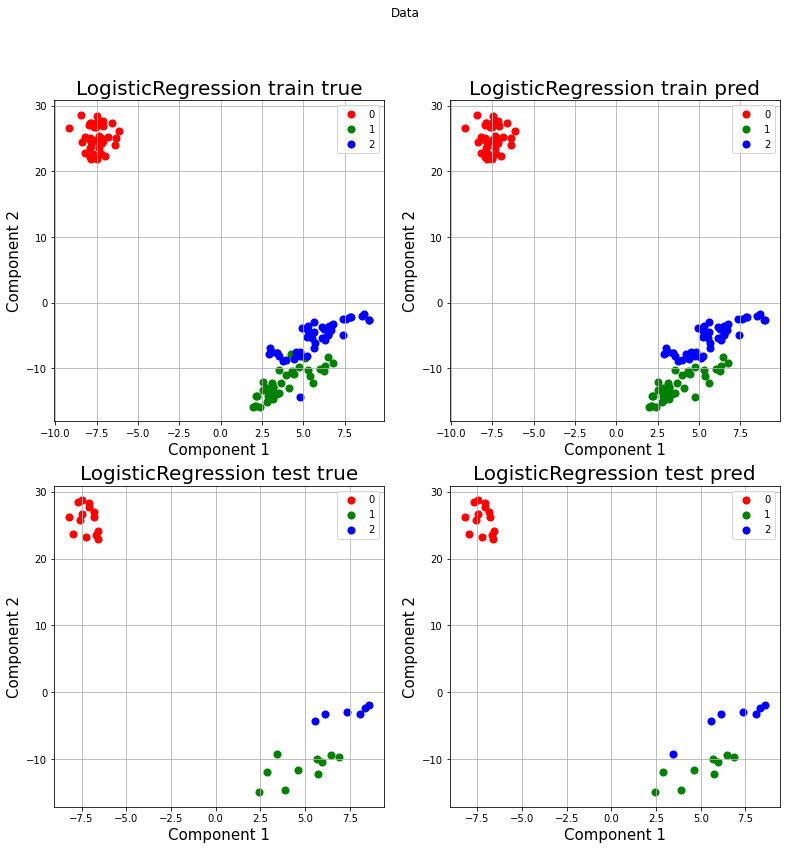

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
ans = train_model(train, test, model, 'LogisticRegression')

accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0


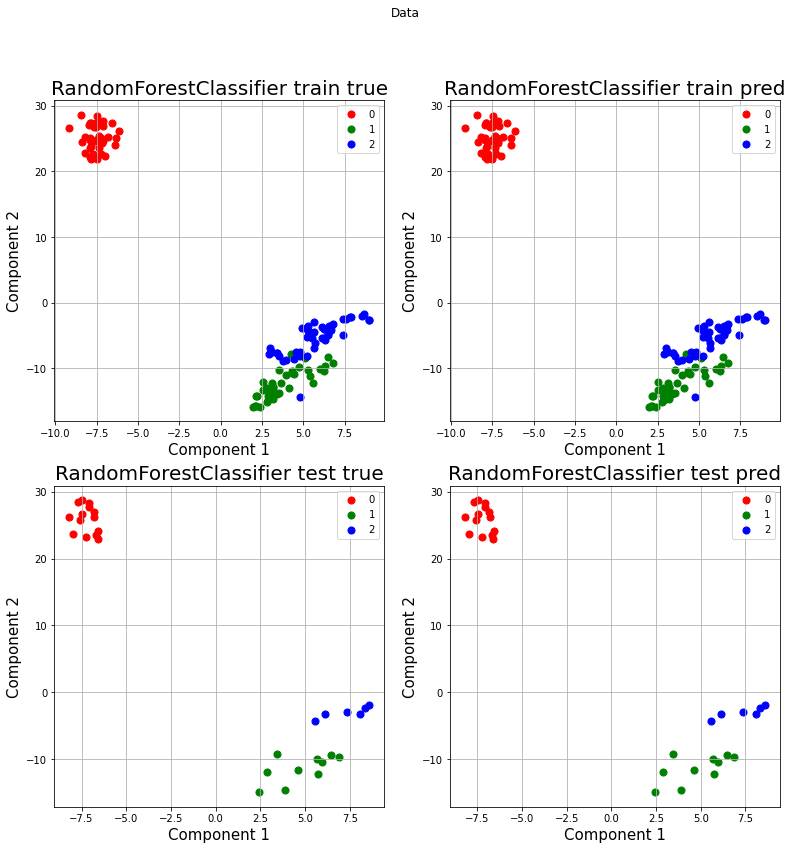

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
ans = train_model(train, test, model, 'RandomForestClassifier')

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


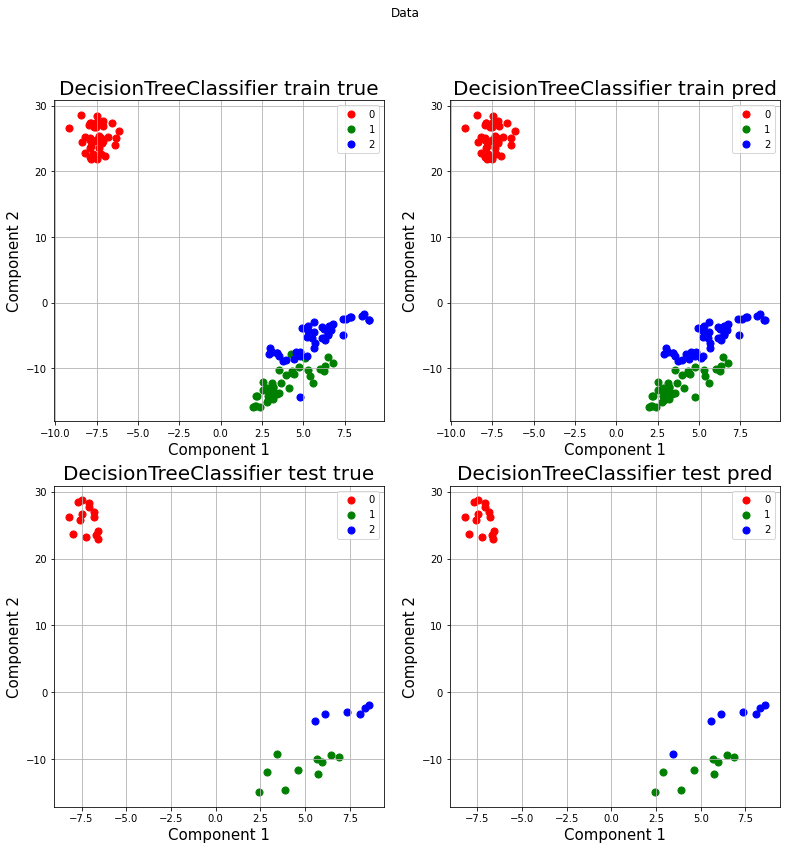

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()
ans = train_model(train, test, model, 'DecisionTreeClassifier')

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


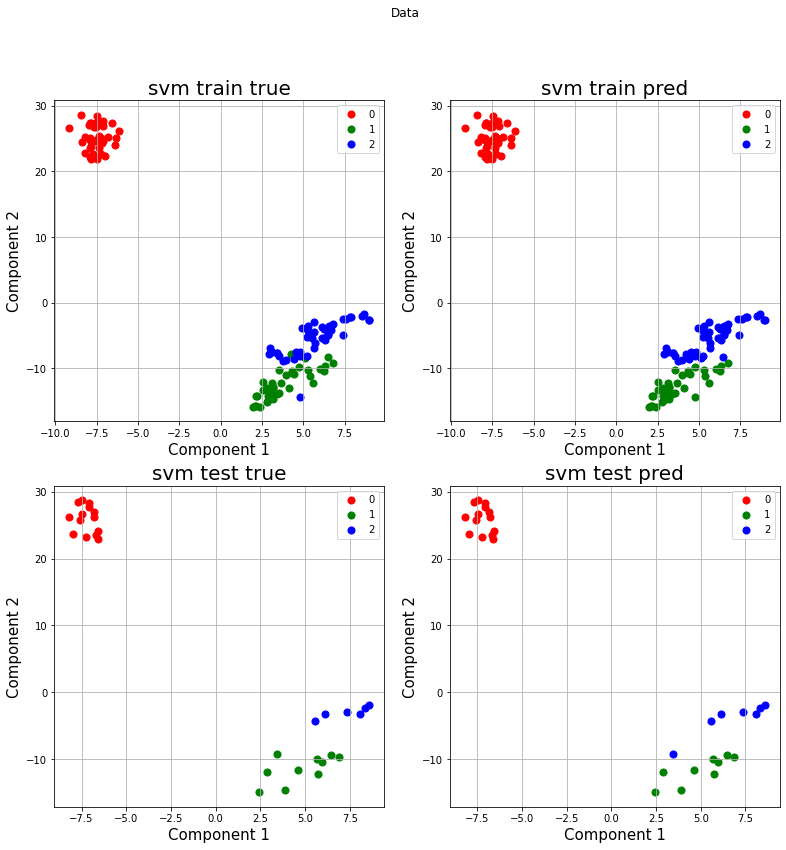

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn import svm
model = svm.SVC()
ans = train_model(train, test, model, 'svm')

accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0


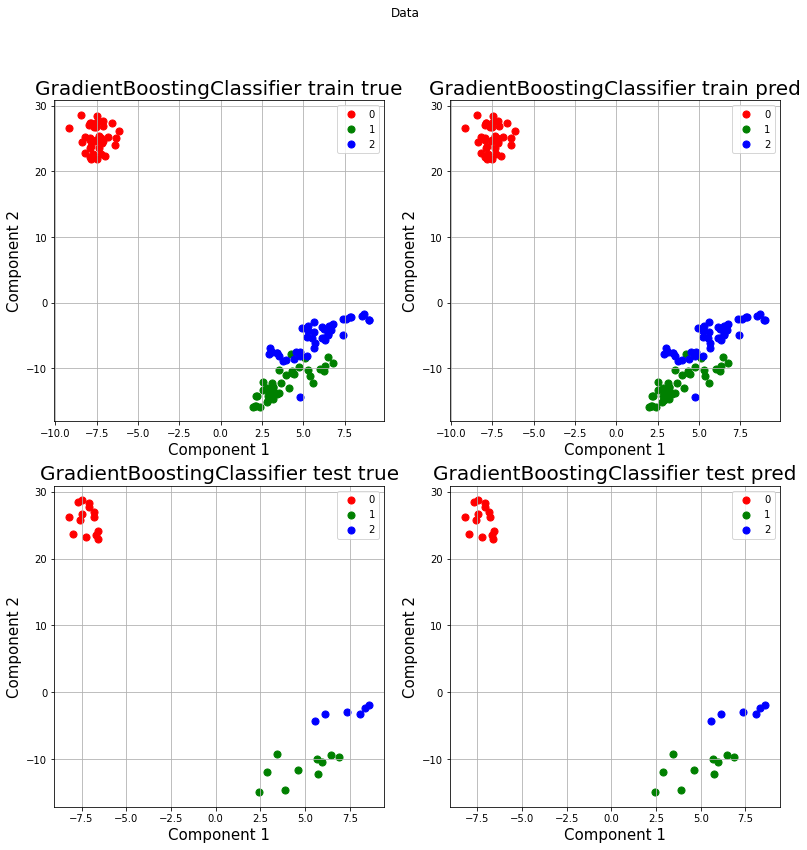

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
ans = train_model(train, test, model, 'GradientBoostingClassifier')

Качество классификации на высоком уровне - нет ошибок на тестовой выборке

3. Провести настройку параметров классификаторов с использованием gridsearchcv. Результаты настройки сохранить для следующего пункта. (При защите будет уделяться особое внимание параметрам классификации (обязательно знать, что каждый параметр обозначает) и принципу их обучения и работы)

In [ ]:
from sklearn.model_selection import GridSearchCV
X = train.drop(columns=['target'])
Y = train['target']

In [ ]:
parameters = {
  'n_neighbors' : (list(range(1, 30))),
  'weights' : ('uniform', 'distance'), 
  'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'), 
  'p' : [1,2,3,5,10,100],
  'metric' : ('minkowski', 'cityblock' , 'euclidean', 'manhattan')
}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X, Y)
clf.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
grid={'criterion' : ['gini', 'entropy'],
      "splitter":["best","random"],
      'min_samples_split': list(range(2,20))
      }

model = DecisionTreeClassifier()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}

In [ ]:
grid={"C":np.logspace(-3,3,7),
      "kernel":["linear","poly","rbf","sigmoid" ],
      'degree': list(range(1,9)),
      }
model = svm.SVC()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'C': 1.0, 'degree': 1, 'kernel': 'sigmoid'}

In [ ]:
grid={"learning_rate":np.linspace(0,10,50),
      "n_estimators":list(range(1,100, 20)),
      }
model = GradientBoostingClassifier()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 274, in _check_params
    raise ValueError(
ValueError: learning_rate must be greater than 0 but was 0.0

  warnings.warn(s

{'learning_rate': 4.8979591836734695, 'n_estimators': 21}

In [ ]:
grid={"n_estimators":list(range(1,300, 50)),
      "max_depth":list(range(10,100, 5))
      }
model = RandomForestClassifier()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'max_depth': 10, 'n_estimators': 101}

4. Провести классификацию (с параметрами из предыдущего пункта). После обучения требуется визуализировать тестовую выборку:
С исходными метками
С метками полученными при классификации (пункт 2)
С метками полученными при классификации
В отчёт включить все графики. Сделать выводы о качестве классификации. Сравнить с результатами 2 пункта.


In [ ]:
def vis_data_2(X,Y,X_t, Y_t, pred, pred_t,pred_param, pred_t_param, method_name):
    pred = pd.Series(pred)
    pred_t = pd.Series(pred_t)
    fig, ((ax1, ax2, ax22), (ax3, ax4, ax44)) = plt.subplots(2, 3)
    fig.suptitle('Data')
    fig.set_figheight(15)
    fig.set_figwidth(25)
    
    # train original
    Df = pd.DataFrame(data = X
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y], axis = 1)
    ax1.set_xlabel('Component 1', fontsize = 15)
    ax1.set_ylabel('Component 2', fontsize = 15)
    ax1.set_title(method_name + 'train true', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax1.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax1.legend(targets)
    ax1.grid()

    # train pred

    Df = pd.DataFrame(data = X.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred
    fig = plt.figure(figsize = (8,8))
    ax2.set_xlabel('Component 1', fontsize = 15)
    ax2.set_ylabel('Component 2', fontsize = 15)
    ax2.set_title(method_name + 'train pred', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax2.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax2.legend(targets)
    ax2.grid()

    # train pred_metr

    Df = pd.DataFrame(data = X.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_param
    fig = plt.figure(figsize = (8,8))
    ax22.set_xlabel('Component 1', fontsize = 15)
    ax22.set_ylabel('Component 2', fontsize = 15)
    ax22.set_title(method_name + 'train pred with search', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax22.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax22.legend(targets)
    ax22.grid()

    # test original

    Df = pd.DataFrame(data = X_t
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y_t], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax3.set_xlabel('Component 1', fontsize = 15)
    ax3.set_ylabel('Component 2', fontsize = 15)
    ax3.set_title(method_name + 'test true', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax3.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax3.legend(targets)
    ax3.grid()

    # test pred
    
    Df = pd.DataFrame(data = X_t.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_t
    fig = plt.figure(figsize = (8,8))
    ax4.set_xlabel('Component 1', fontsize = 15)
    ax4.set_ylabel('Component 2', fontsize = 15)
    ax4.set_title(method_name + 'test pred', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax4.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax4.legend(targets)
    ax4.grid()

     # test pred_metr
    
    Df = pd.DataFrame(data = X_t.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_t_param
    fig = plt.figure(figsize = (8,8))
    ax44.set_xlabel('Component 1', fontsize = 15)
    ax44.set_ylabel('Component 2', fontsize = 15)
    ax44.set_title(method_name + 'test pred with search', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax44.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax44.legend(targets)
    ax44.grid()
    
def train_model_2(train,test, model, model_param, method_name, metrics = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted']):
    X = train.drop(columns=['target'])
    Y = train['target']
    X_t = test.drop(columns=['target'])
    Y_t = test['target']
    metric = my_cross_val(X,Y, model, metrics)
    metric_param = my_cross_val(X,Y, model_param, metrics)
    model.fit(X, Y)
    model_param.fit(X, Y)
    answers_t = model.predict(X_t)
    answers = model.predict(X)

    metrics_test = []
    metrics_test.append(accuracy_score(Y_t, answers_t))
    metrics_test.append(precision_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(recall_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(f1_score(Y_t, answers_t, average='weighted'))

    answers_t_param = model_param.predict(X_t)
    answers_param = model_param.predict(X)
    metrics_test_param = []
    metrics_test_param.append(accuracy_score(Y_t, answers_t_param))
    metrics_test_param.append(precision_score(Y_t, answers_t_param, average='weighted'))
    metrics_test_param.append(recall_score(Y_t, answers_t_param, average='weighted'))
    metrics_test_param.append(f1_score(Y_t, answers_t_param, average='weighted')) 
    vis_data_2(X, Y, X_t,Y_t,answers,answers_t,answers_param, answers_t_param,method_name )
    print('accuracy_score = ' + str(metrics_test[0]))
    print('precision_score = ' + str(metrics_test[1]))
    print('recall_score = ' + str(metrics_test[2]))
    print('f1_score = ' + str(metrics_test[3]))
    return model,model_param, metric, metric_param, metrics_test, metrics_test_param

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


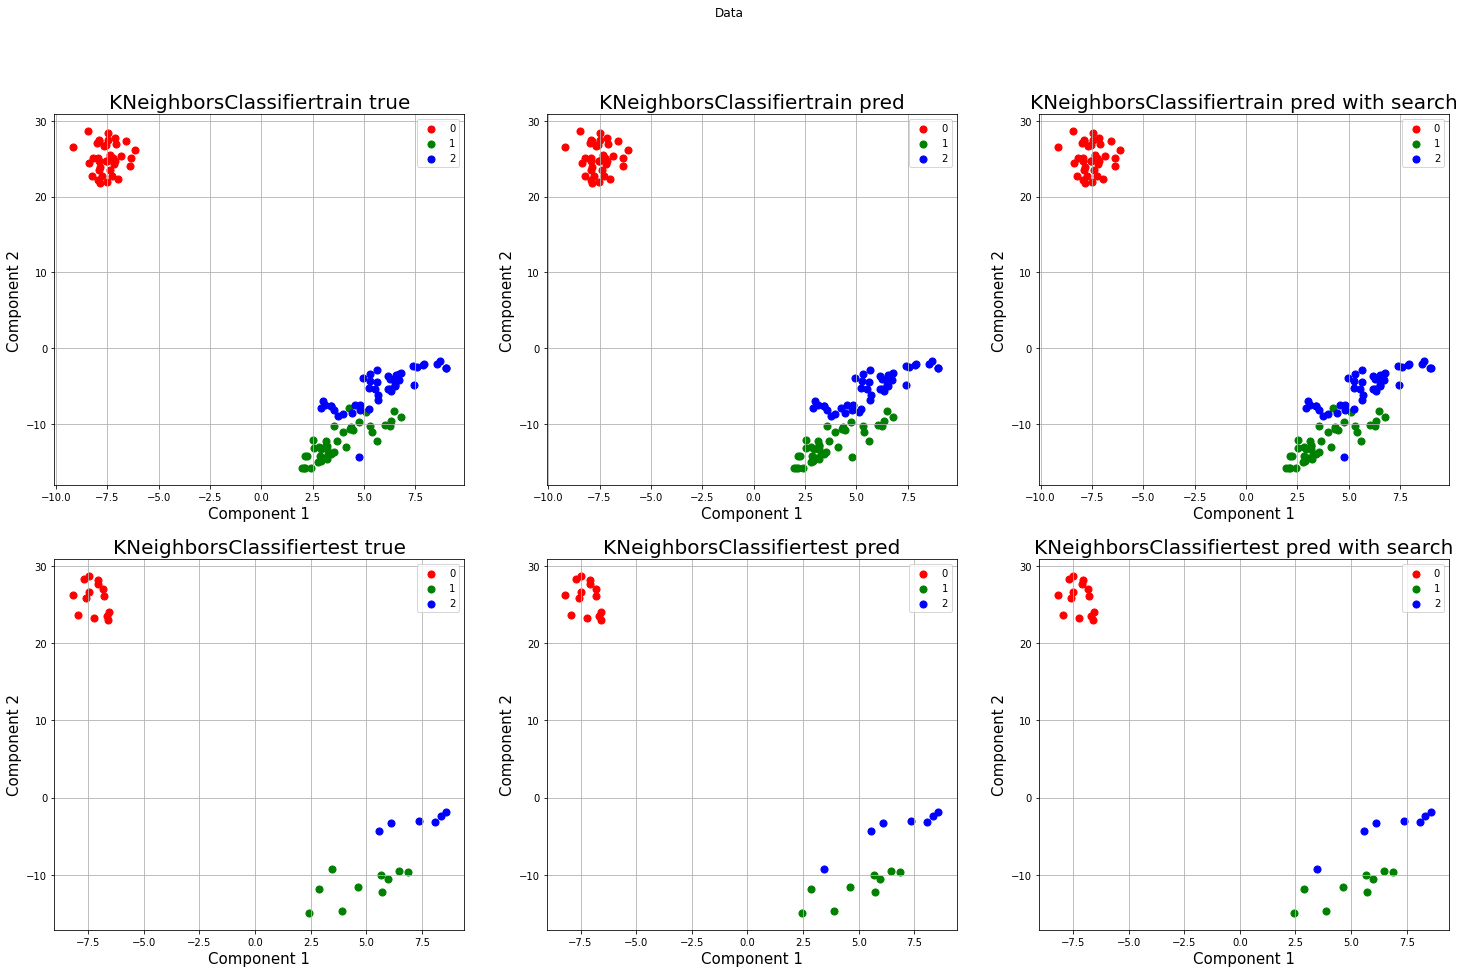

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model = KNeighborsClassifier()
model_param =KNeighborsClassifier(algorithm = 'auto',
                    metric = 'minkowski',
                    n_neighbors =  3,
                    p = 3,
                    weights = 'distance')
ans = train_model_2(train,test, model, model_param, 'KNeighborsClassifier')

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


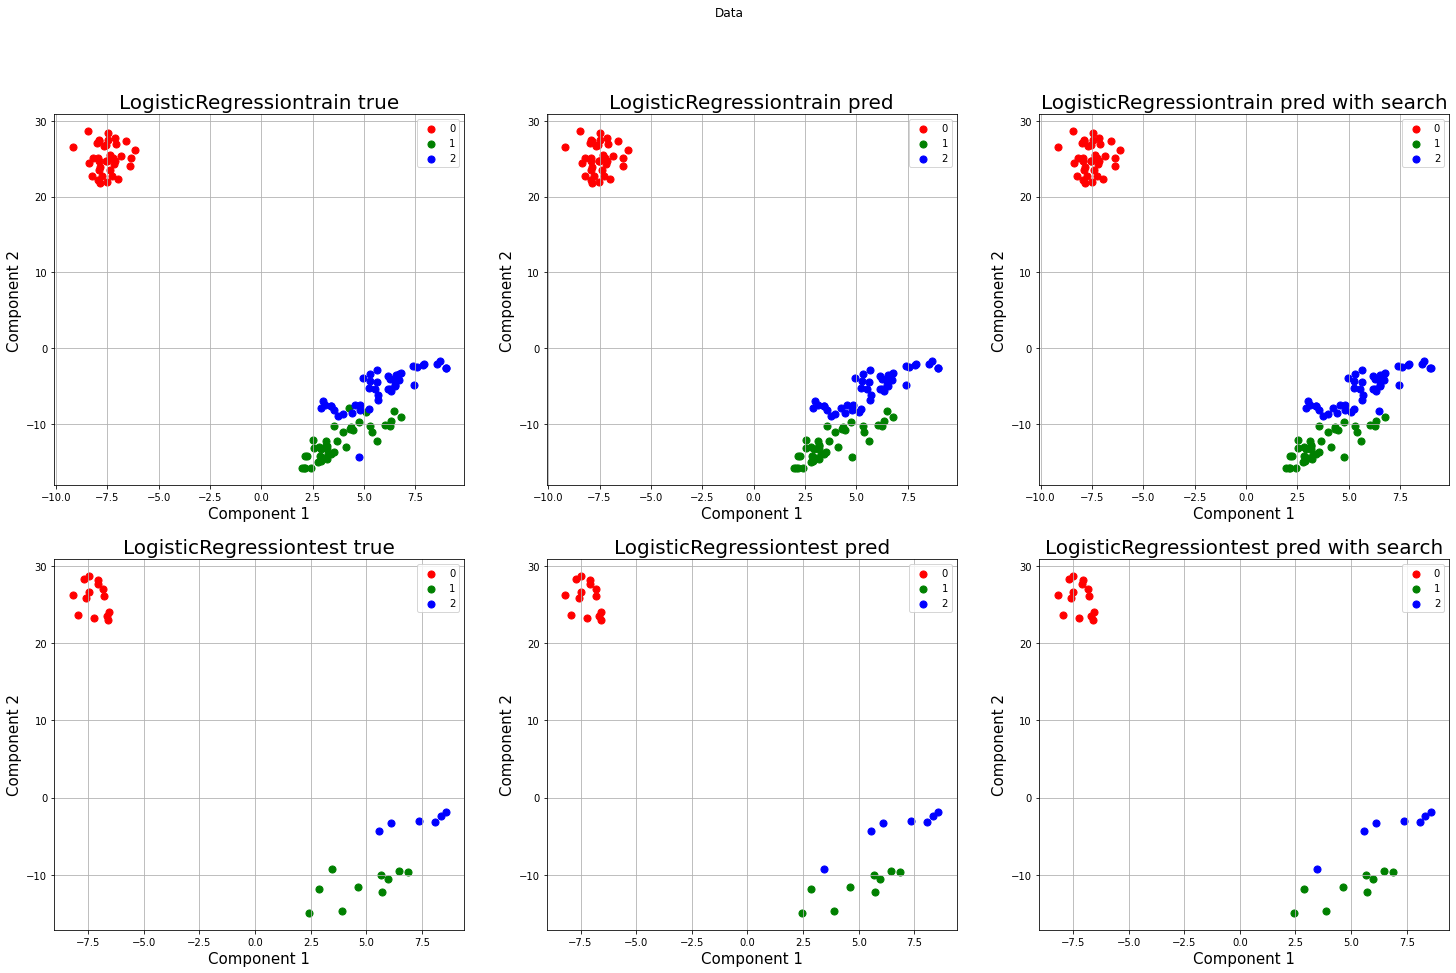

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model = LogisticRegression()
model_param = LogisticRegression(C = 0.1, penalty = 'l2') 
ans = train_model_2(train,test, model, model_param,'LogisticRegression')

accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0


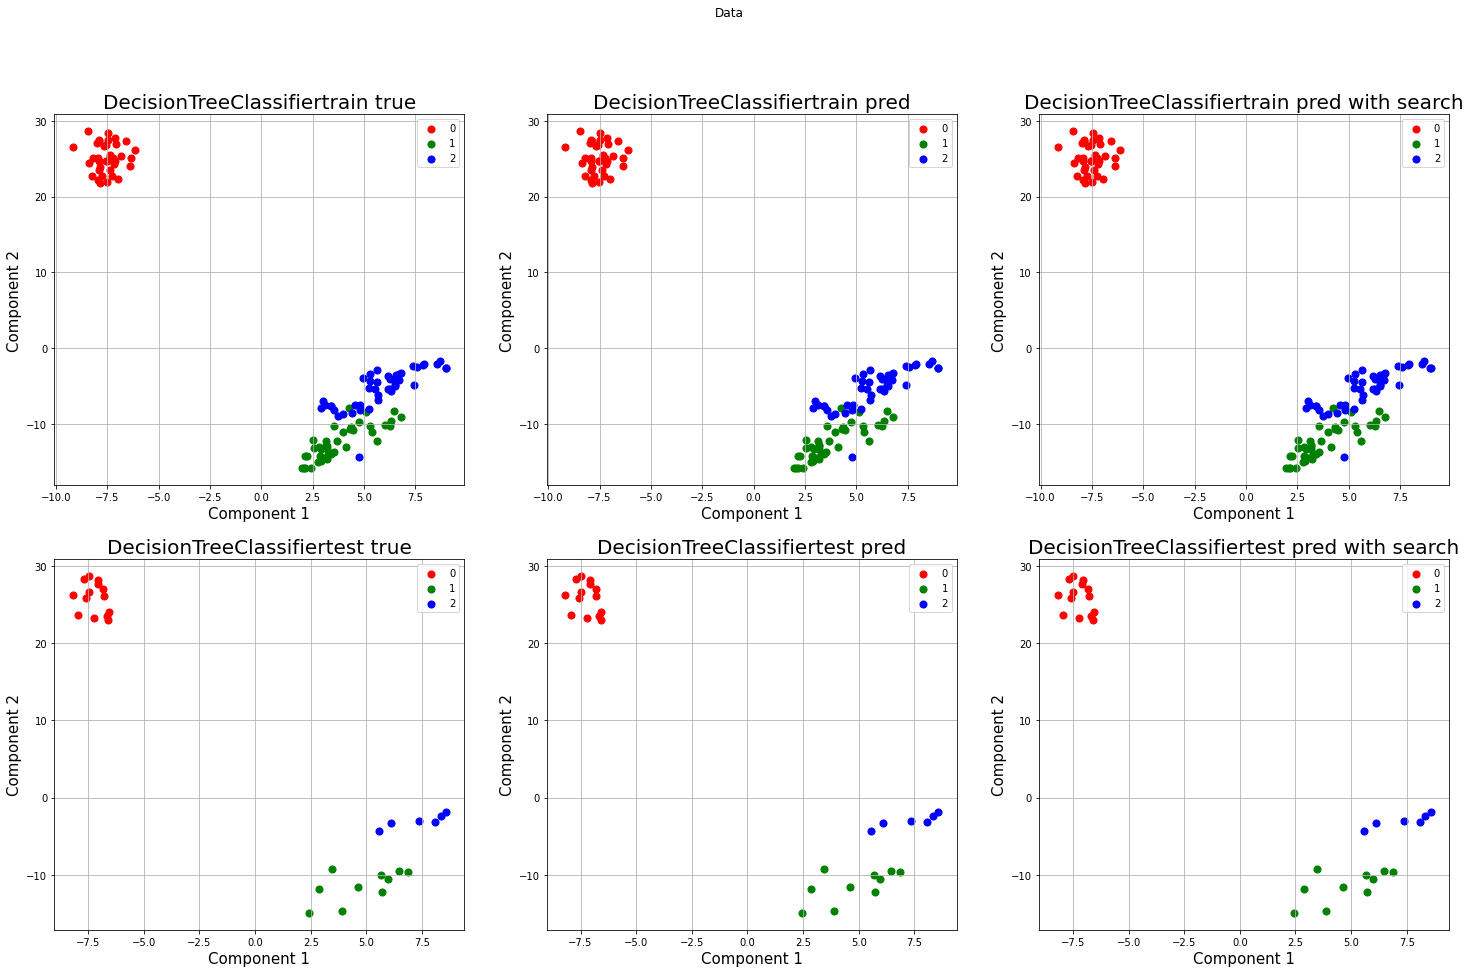

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model_param = DecisionTreeClassifier(
    criterion =  'gini',
    min_samples_split = 2,
    splitter = 'random'
)
model= DecisionTreeClassifier() 
ans = train_model_2(train,test, model, model_param,'DecisionTreeClassifier')



accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


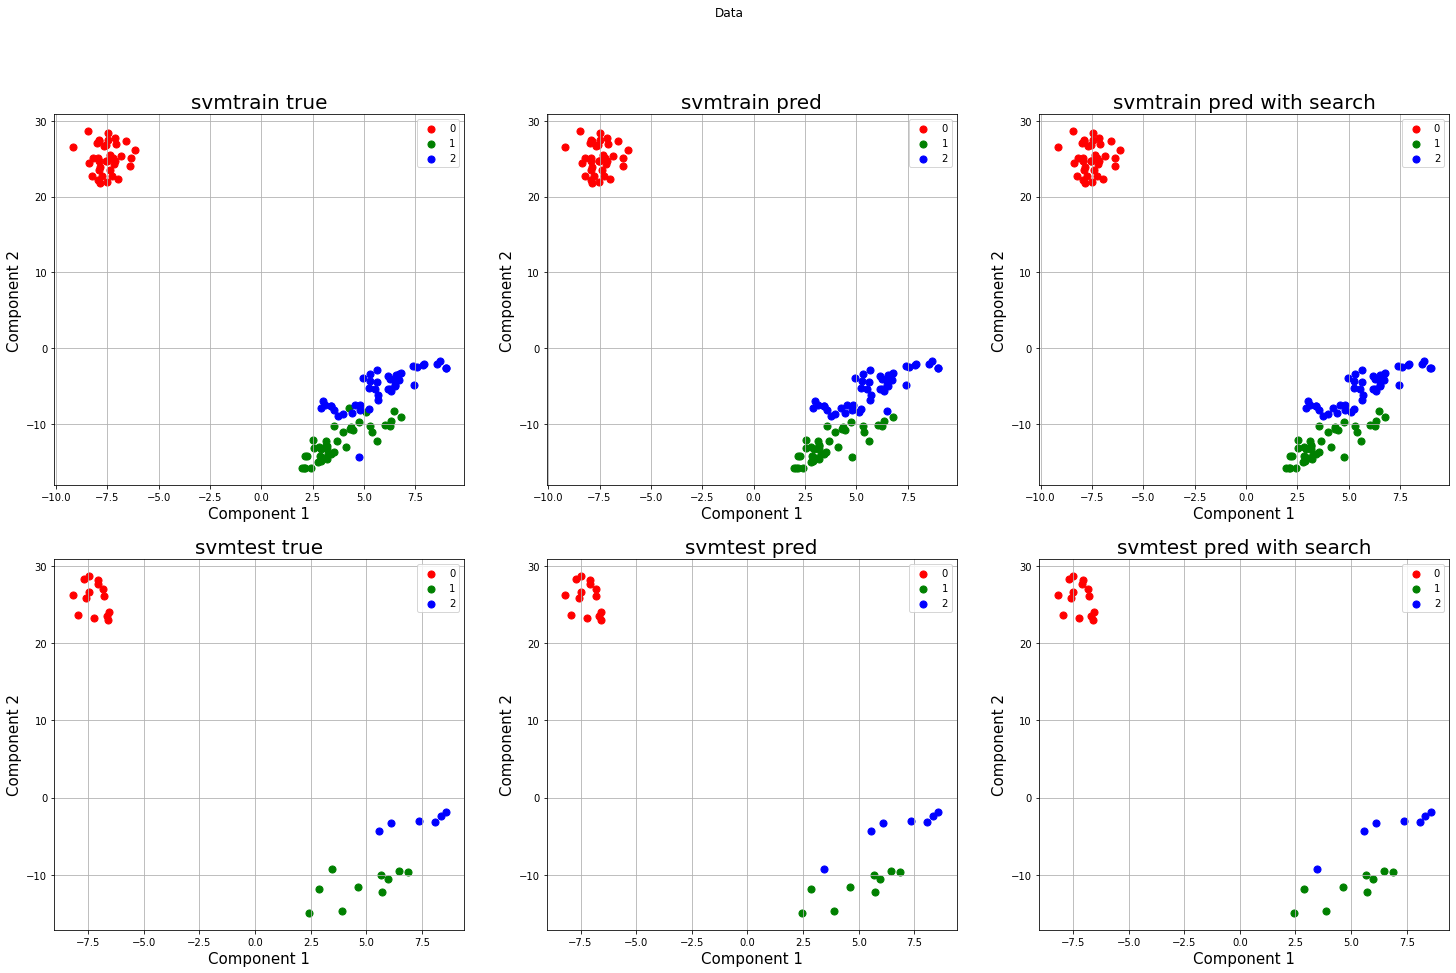

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model_param = svm.SVC(
    C = 0.1,
    degree = 1,
    kernel = 'linear'
)
model= svm.SVC() 
ans = train_model_2(train,test, model, model_param,'svm')

accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0


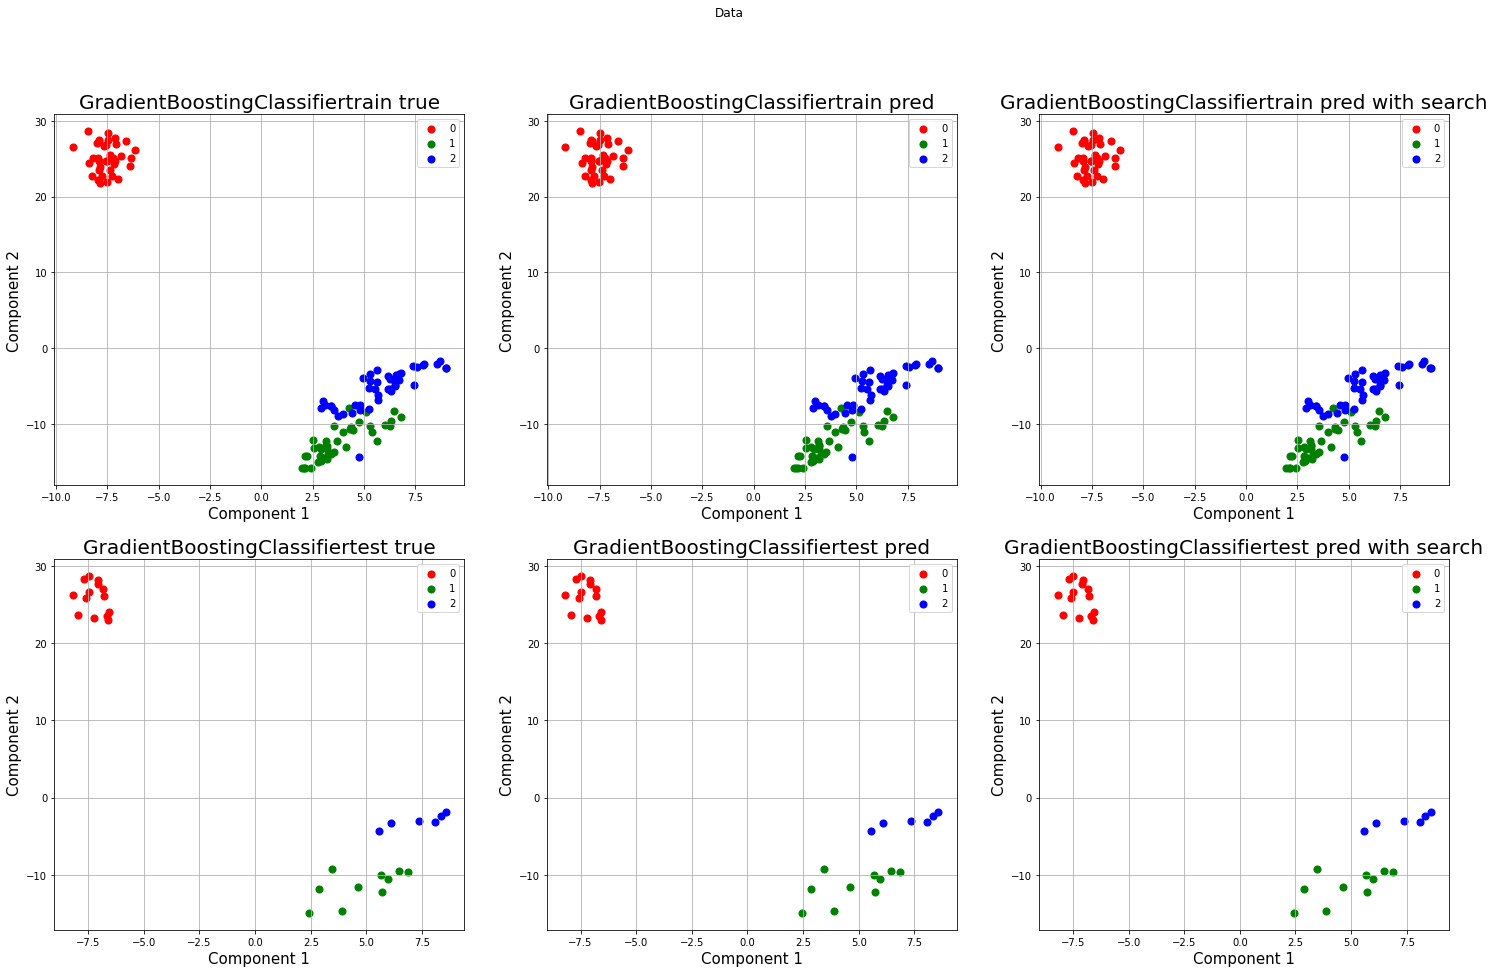

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model_param = GradientBoostingClassifier(
    learning_rate = 0.8080808080808081,
    n_estimators = 21
)
model= GradientBoostingClassifier() 
ans = train_model_2(train,test, model, model_param,'GradientBoostingClassifier')


accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0


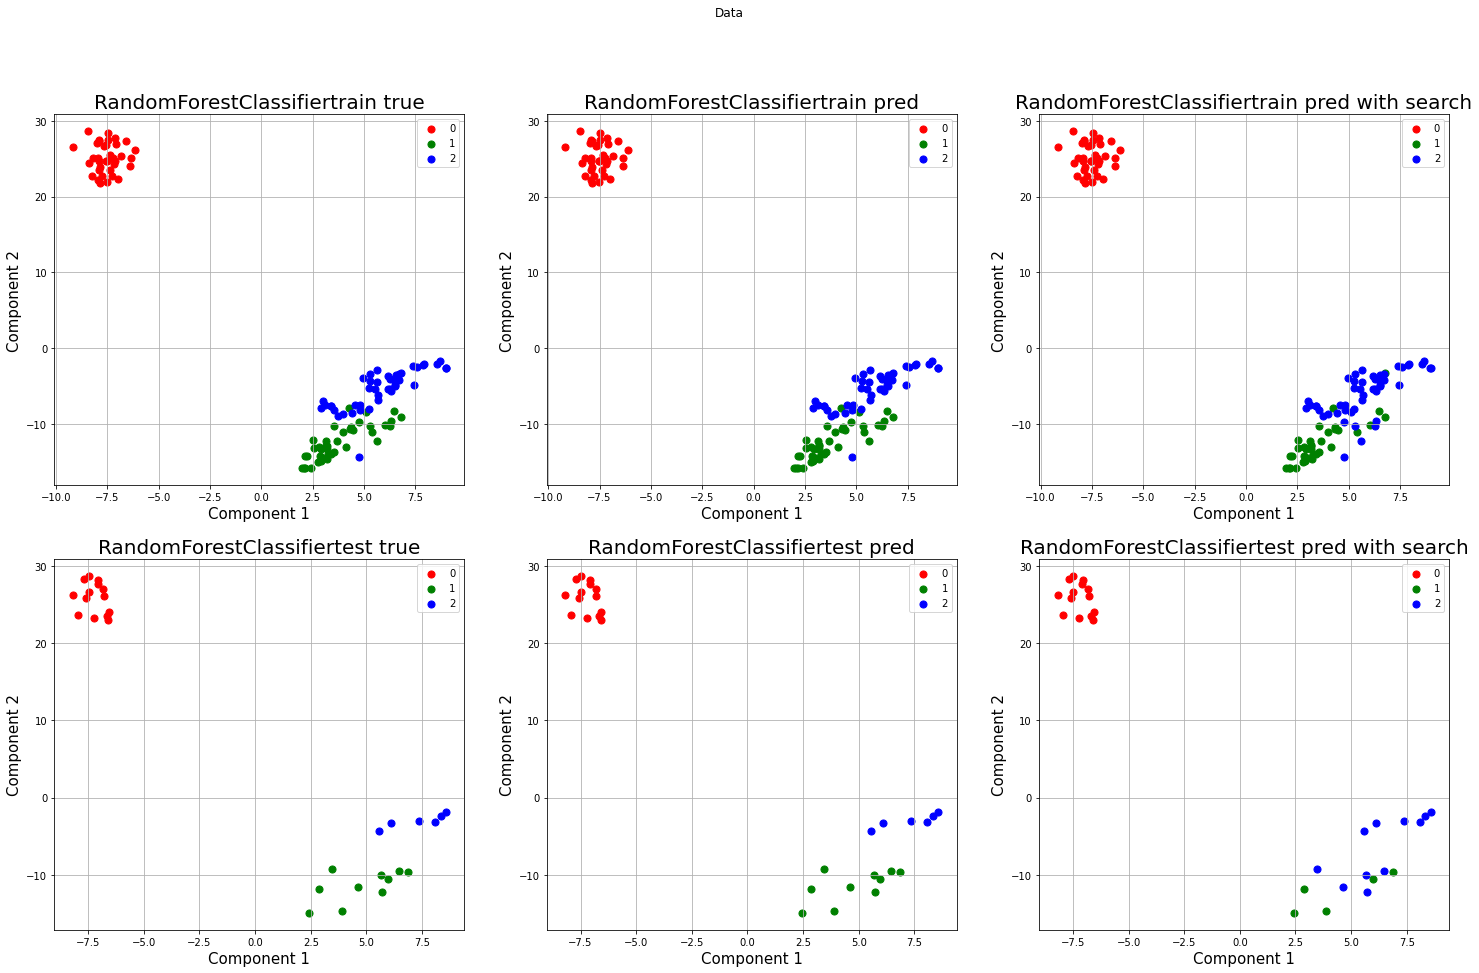

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model_param = RandomForestClassifier(
    n_estimators = 1,
    max_depth = 55
)
model= RandomForestClassifier() 
ans = train_model_2(train,test, model, model_param,'RandomForestClassifier')

Некоторые классификаторы не изменили сви метрики качества, что связано с тем, что найденные параметры равны параметрам по умолчанию. Те же что отличаются, улучшили метрики классификаторов. 

Попробуем радомный посик гиперпараметров

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":list(range(1,300, 50)),
      "max_depth":list(range(10,100, 5))
      }
model = RandomForestClassifier()
clf = RandomizedSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'n_estimators': 151, 'max_depth': 80}

accuracy_score = 0.9666666666666667
precision_score = 0.9714285714285714
recall_score = 0.9666666666666667
f1_score = 0.9670715249662618


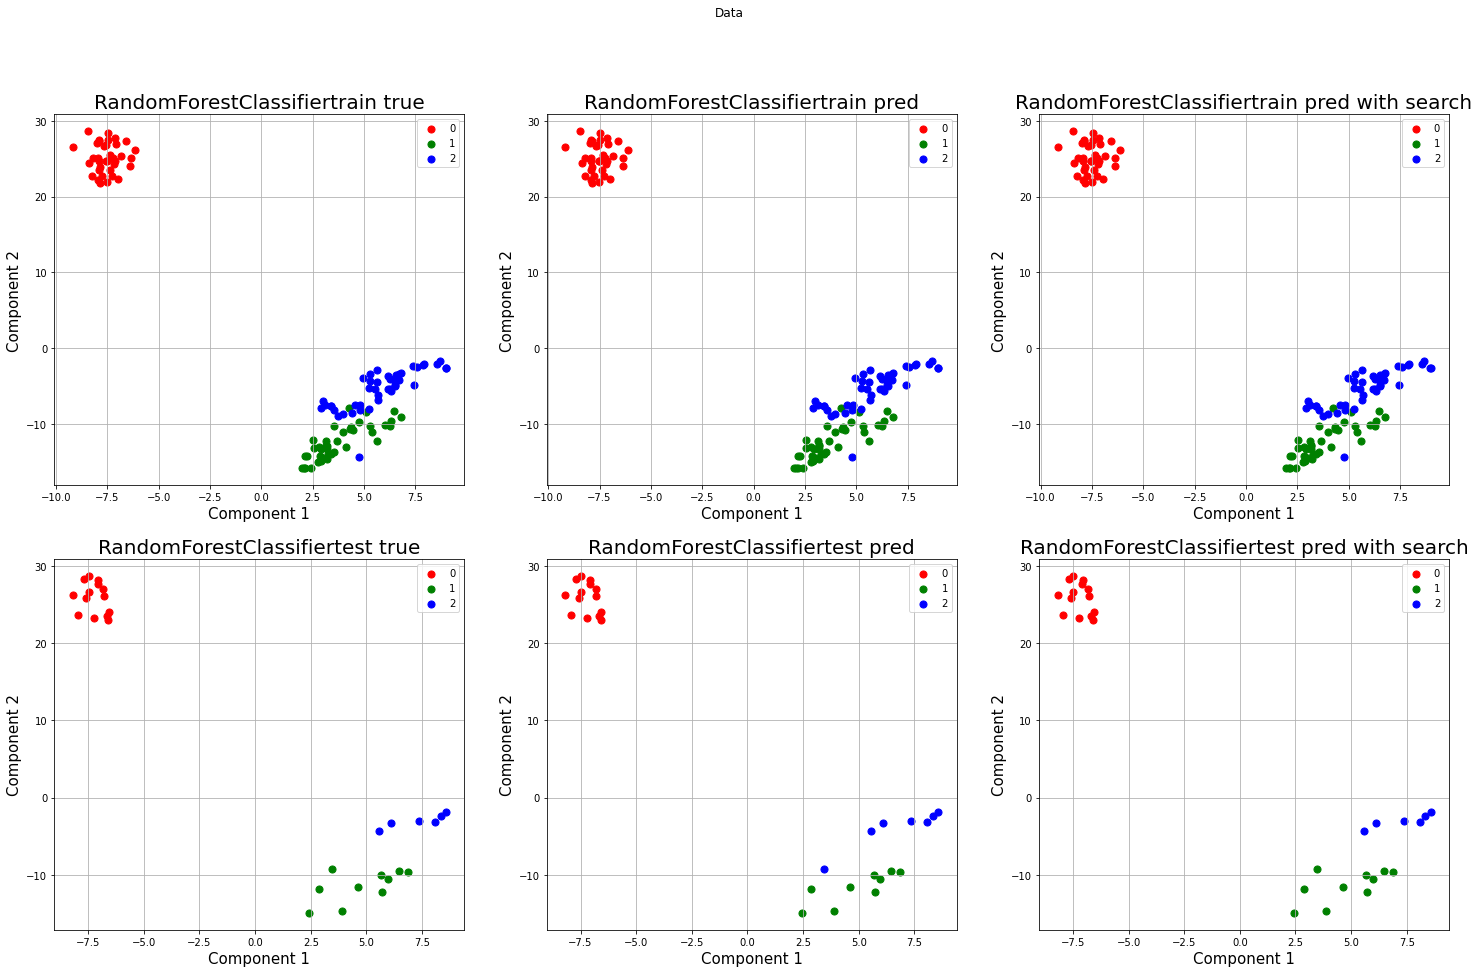

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model_param = RandomForestClassifier(
    n_estimators = 151,
    max_depth = 20
)
model= RandomForestClassifier() 
ans = train_model_2(train,test, model, model_param,'RandomForestClassifier')

In [ ]:
grid={"n_estimators":list(range(1,300, 50)),
      "max_depth":list(range(10,100, 5))
      }
model = GradientBoostingClassifier()
clf = RandomizedSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'n_estimators': 1, 'max_depth': 70}

accuracy_score = 1.0
precision_score = 1.0
recall_score = 1.0
f1_score = 1.0


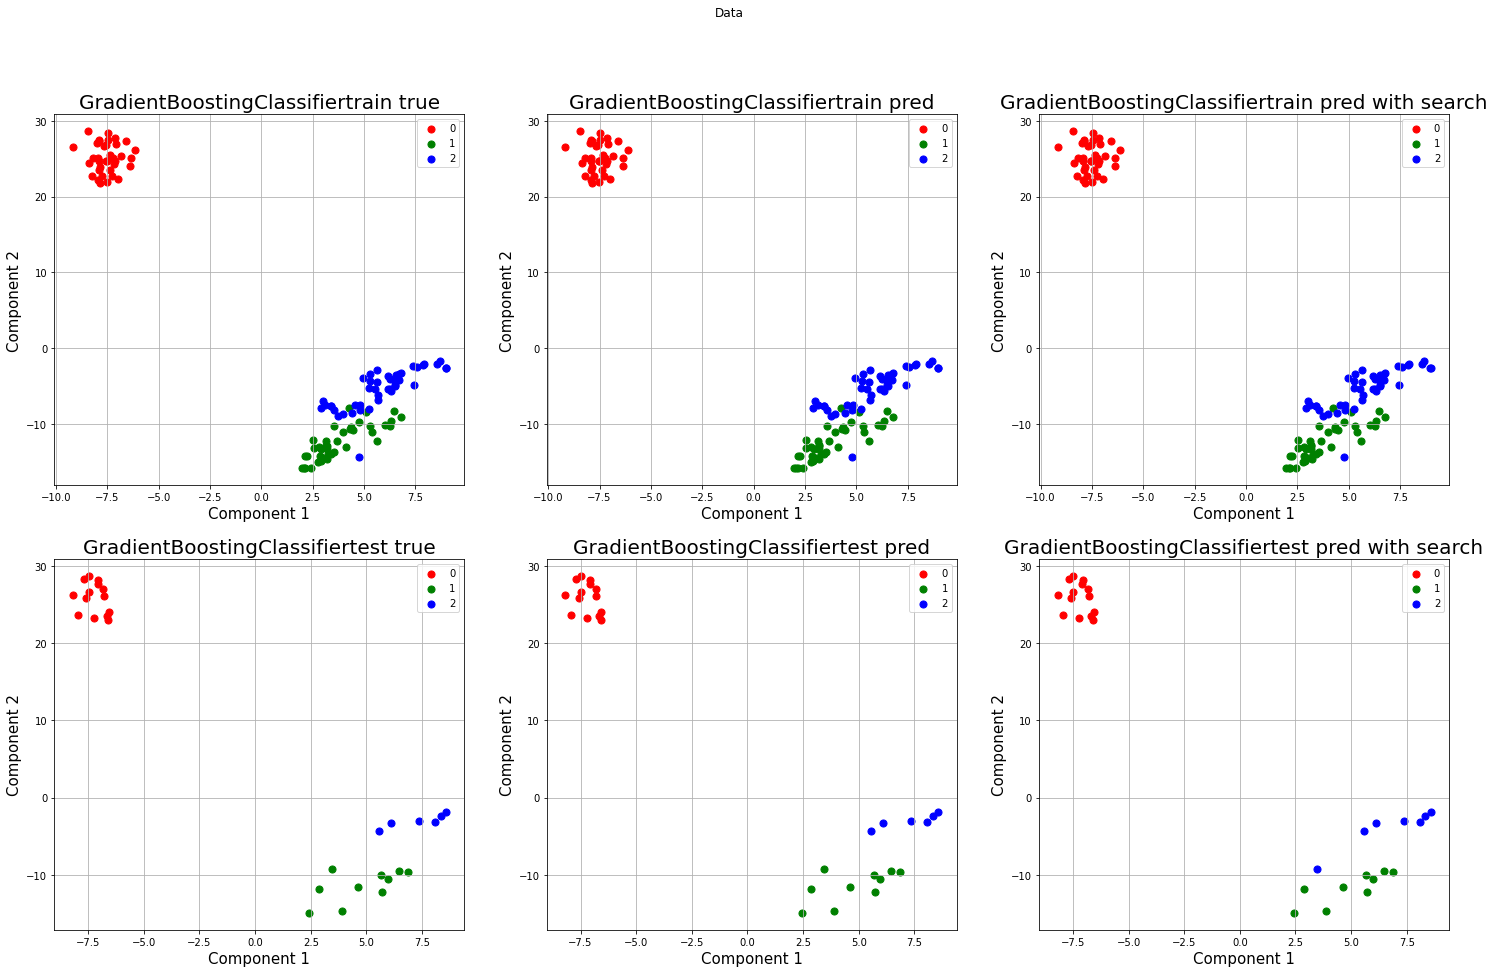

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
model_param = GradientBoostingClassifier(
    n_estimators = 101,
    max_depth = 35
)
model= GradientBoostingClassifier() 
ans = train_model_2(train,test, model, model_param,'GradientBoostingClassifier')

Рандомный поиск работает на таком же уровне, но при этом на несколько порядков быстрее

5. Исследовать возможность проведения классификации данных, содержащихся в датасете: 


In [ ]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
mnist.iloc[:, 1:]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE
pca = TSNE(n_components=2)
data = mnist.iloc[:, 1:]
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf['target'] = mnist.iloc[:,0]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'tan', 'peru', 'pink', 'teal']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
model_mnist = RandomForestClassifier()
model_mnist.fit(mnist.iloc[:15000, 1:], mnist.iloc[:15000, 0])


RandomForestClassifier()

In [ ]:
answers_mnist = model_mnist.predict(mnist.iloc[15000:, 1:])
y = mnist.iloc[15000:, 0]
metrics_test = []
metrics_test.append(accuracy_score(y, answers_mnist))
metrics_test.append(precision_score(y, answers_mnist, average='weighted'))
metrics_test.append(recall_score(y, answers_mnist, average='weighted'))
metrics_test.append(f1_score(y, answers_mnist, average='weighted'))

In [ ]:
metrics_test

[0.9565913182636527,
 0.9566684972974305,
 0.9565913182636527,
 0.9565637773548178]